In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

# Step 1: Data preperation

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.duplicated().sum()

2

In [8]:
print(df[df.duplicated(keep=False)])

       RowNumber  CustomerId    Surname  CreditScore Geography  Gender   Age  \
9998        9999    15682355  Sabbatini          772   Germany    Male  42.0   
9999        9999    15682355  Sabbatini          772   Germany    Male  42.0   
10000      10000    15628319     Walker          792    France  Female  28.0   
10001      10000    15628319     Walker          792    France  Female  28.0   

       Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9998        3   75075.31              2        1.0             0.0   
9999        3   75075.31              2        1.0             0.0   
10000       4  130142.79              1        1.0             0.0   
10001       4  130142.79              1        1.0             0.0   

       EstimatedSalary  Exited  
9998          92888.52       1  
9999          92888.52       1  
10000         38190.78       0  
10001         38190.78       0  


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1)

In [11]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,650.503301,38.921071,5.013305,76476.263216,1.530212,0.705482,0.514906,100106.701248,0.203782
std,96.624668,10.488421,2.892353,62397.118820,0.581684,0.455849,0.499803,57513.314398,0.402829
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100238.110000,0.000000
75%,717.250000,44.000000,7.250000,127639.372500,2.000000,1.000000,1.000000,149400.107500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Step 2: Exploratory Data Analysis (EDA)

In [13]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

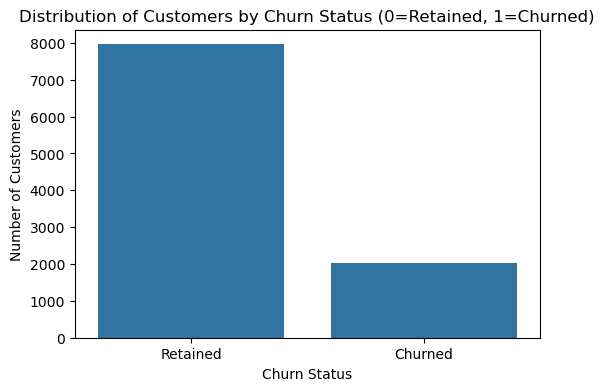

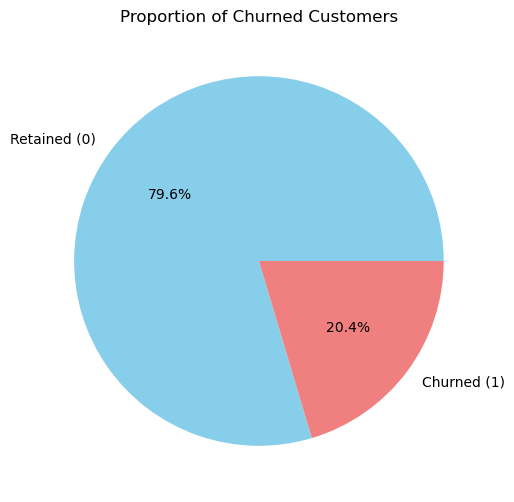

Distribution of target variable 'Exited':
Exited
0    7959
1    2037
Name: count, dtype: int64

Churn Proportion:
Exited
0    79.621849
1    20.378151
Name: proportion, dtype: float64


In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Customers by Churn Status (0=Retained, 1=Churned)')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.show()

plt.figure(figsize=(6, 6))
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'],
                                     labels=['Retained (0)', 'Churned (1)'])
plt.title('Proportion of Churned Customers')
plt.ylabel('')
plt.show()

churn_counts = df['Exited'].value_counts()
churn_percentage = df['Exited'].value_counts(normalize=True) * 100
print("Distribution of target variable 'Exited':")
print(churn_counts)
print("\nChurn Proportion:")
print(churn_percentage)

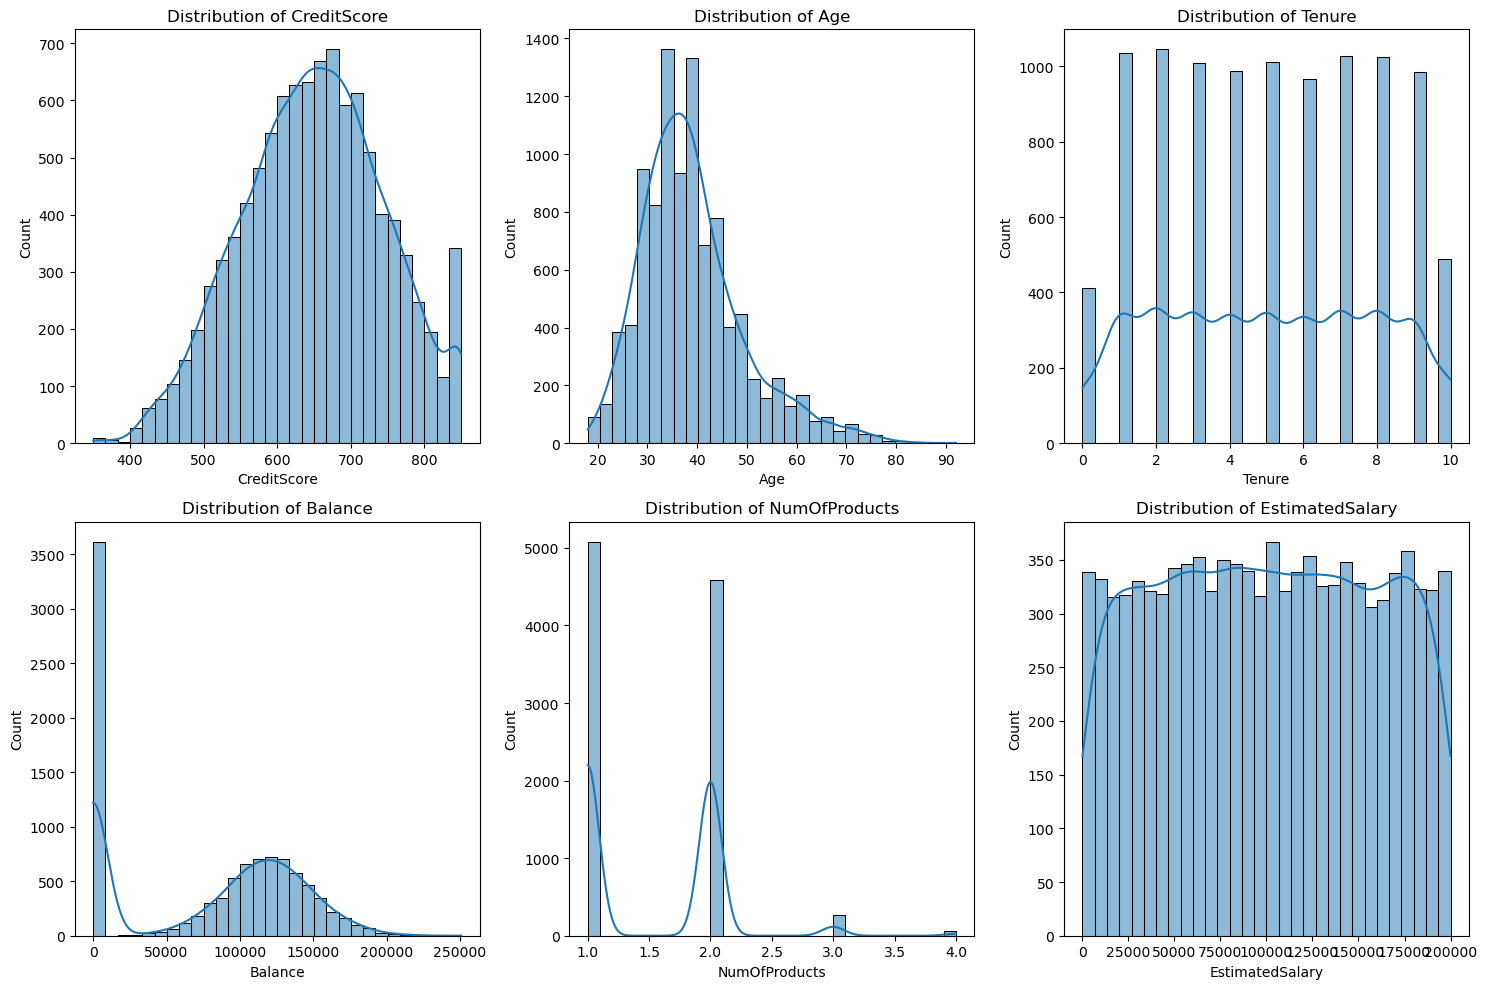

In [15]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1) # 2 rows, 3 columns
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

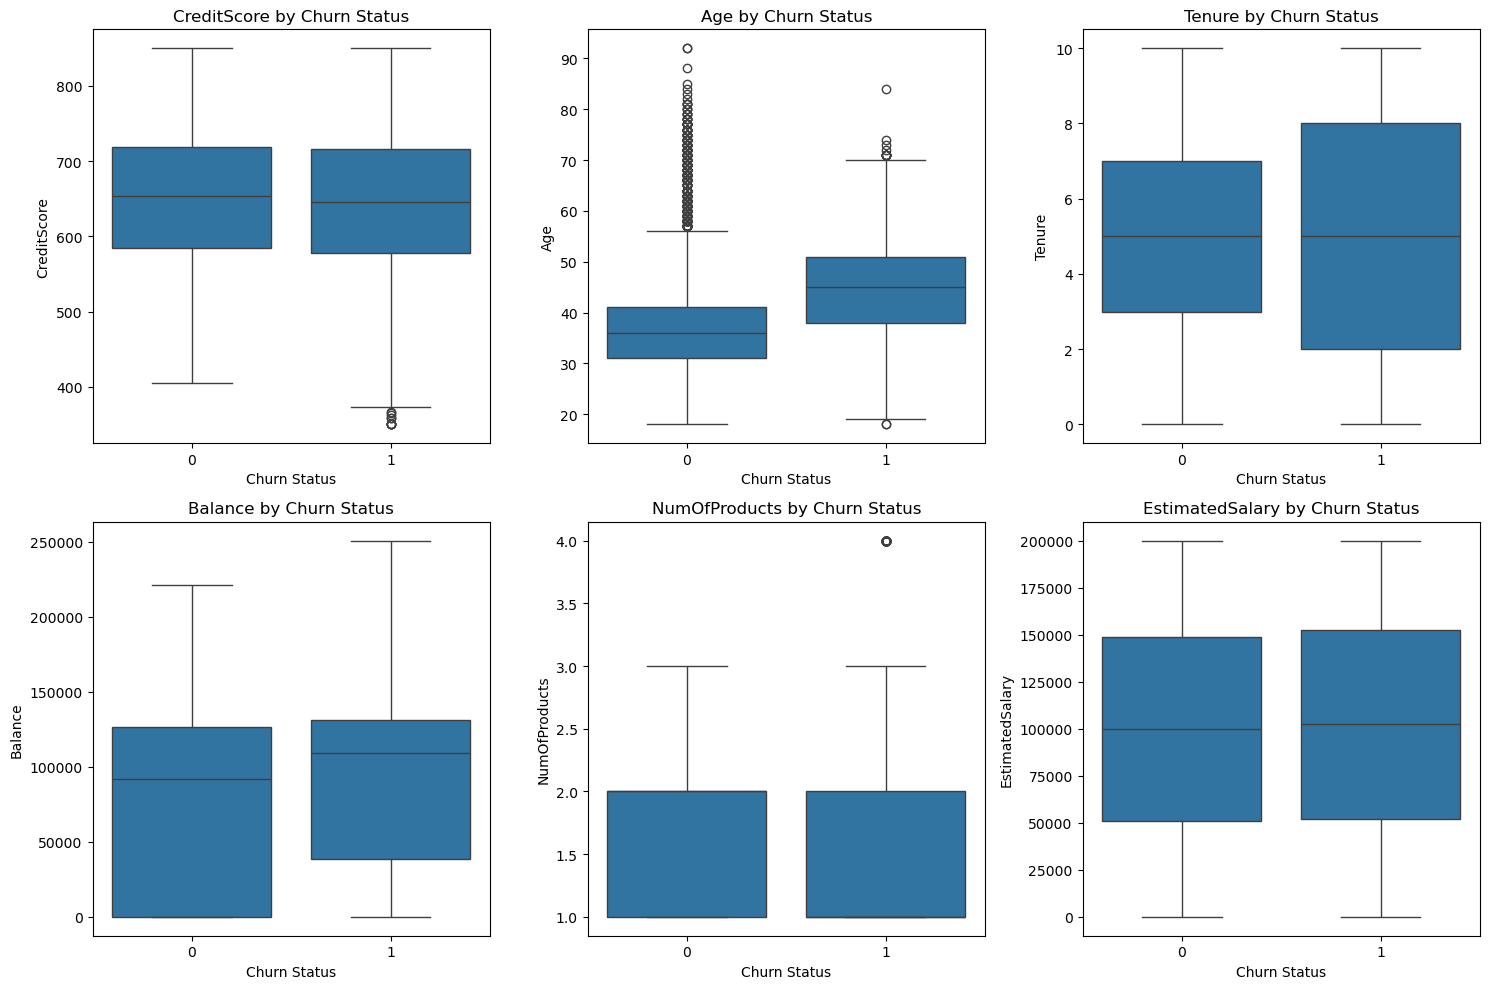

In [16]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} by Churn Status')
    plt.xlabel('Churn Status')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


Correlation of numerical features with 'Exited':
Correlation of 'CreditScore' with 'Exited': -0.0270
Correlation of 'Age' with 'Exited': 0.2854
Correlation of 'Tenure' with 'Exited': -0.0141
Correlation of 'Balance' with 'Exited': 0.1186
Correlation of 'NumOfProducts' with 'Exited': -0.0478
Correlation of 'EstimatedSalary' with 'Exited': 0.0120


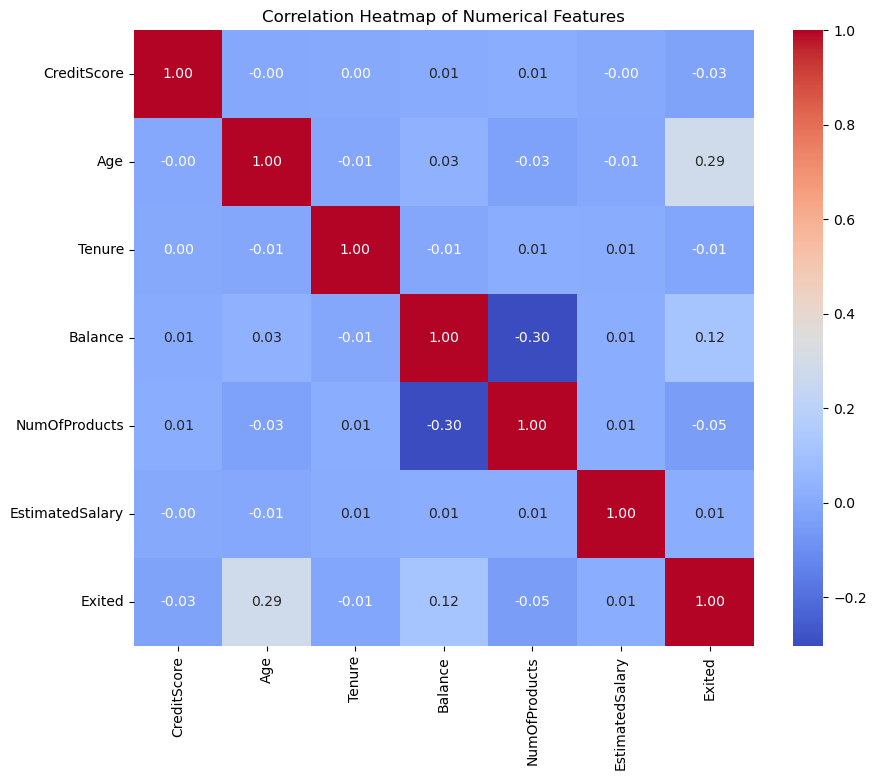

In [17]:
print("\nCorrelation of numerical features with 'Exited':")
for feature in numerical_features:
    correlation = df[feature].corr(df['Exited'])
    print(f"Correlation of '{feature}' with 'Exited': {correlation:.4f}")

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features + ['Exited']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

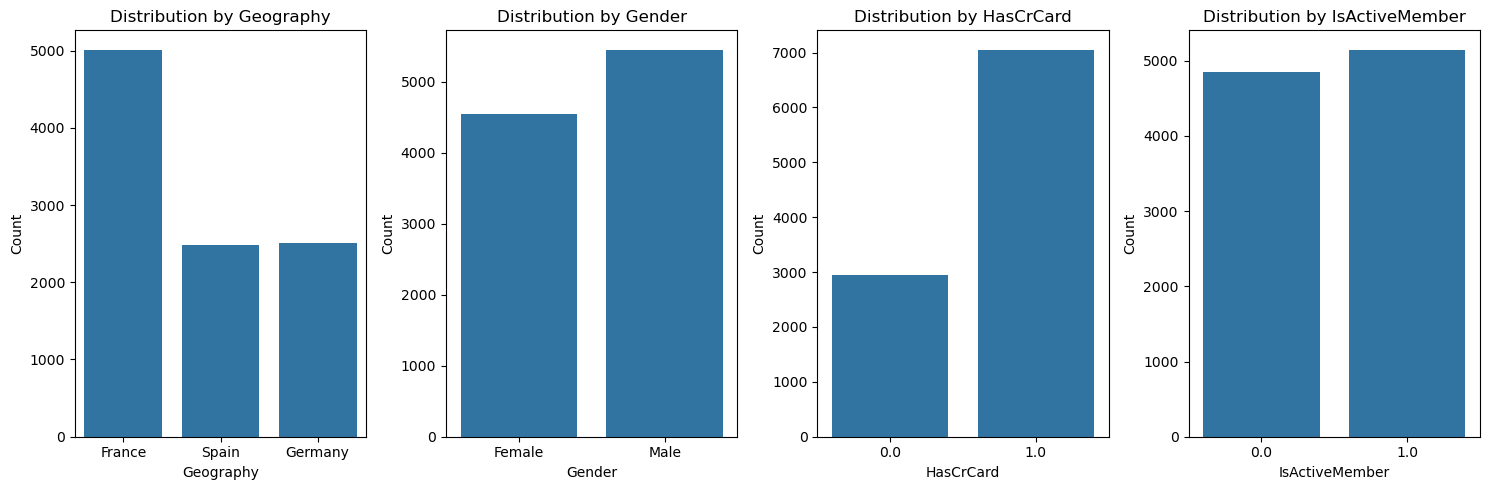

In [18]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 4, i + 1)
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

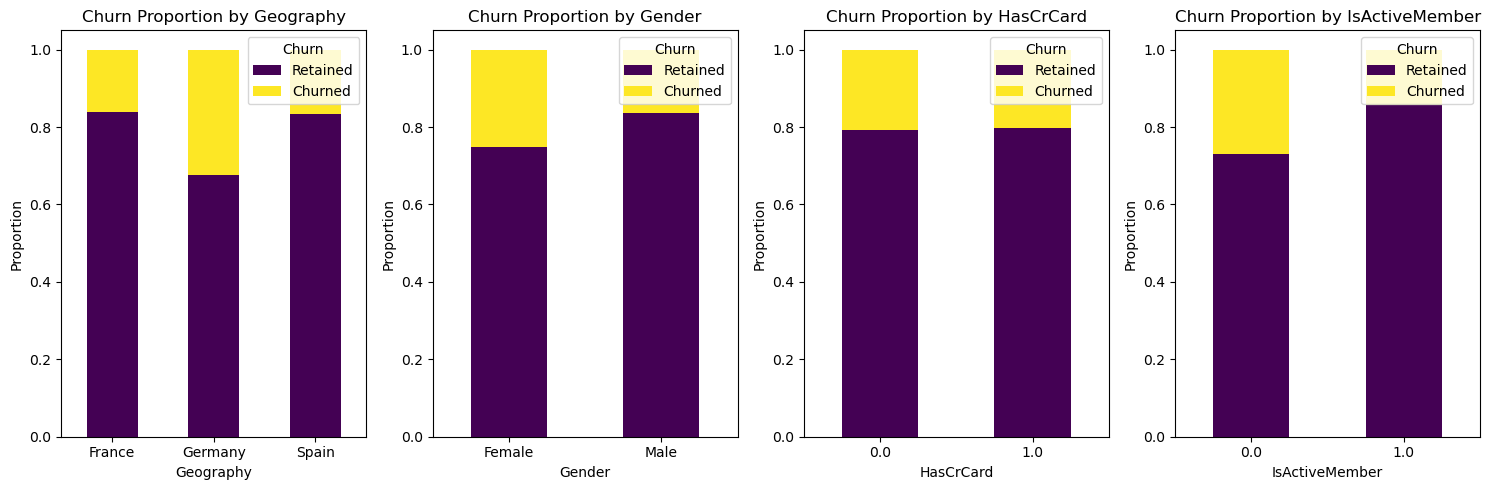

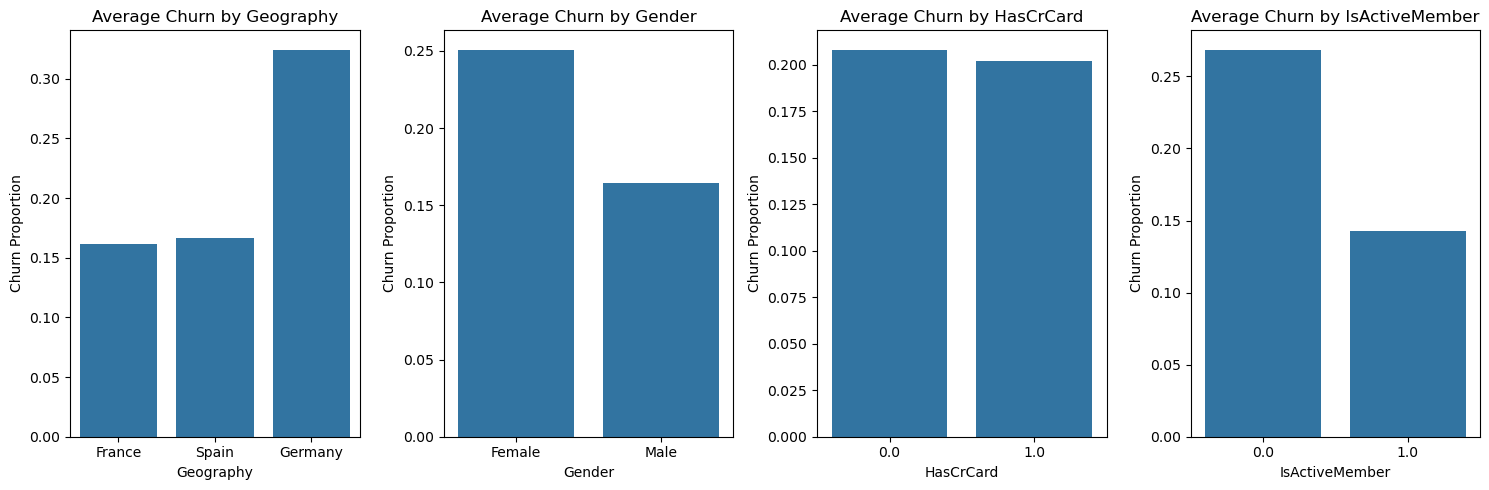

In [19]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 4, i + 1)
    churn_by_category = pd.crosstab(df[feature], df['Exited'], normalize='index')
    churn_by_category.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
    plt.title(f'Churn Proportion by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.legend(title='Churn', labels=['Retained', 'Churned'])
    plt.xticks(rotation=0) # Make X-axis labels horizontal
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 4, i + 1)
    sns.barplot(x=feature, y='Exited', data=df, errorbar=None)
    plt.title(f'Average Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Proportion')
plt.tight_layout()
plt.show()

# Step 3: Feature Engineering & Preprocessing

Balance has many zero values. Perhaps creating a separate binary feature "HasNoBalance" could improve the model.

In [20]:
# Store target variable and features
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train['HasNoBalance'] = (X_train['Balance'] == 0).astype(int)
X_test['HasNoBalance'] = (X_test['Balance'] == 0).astype(int)

raw_numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Define the list of features that need to be scaled (not binary)
features_to_scale = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary'
]

# Features to One-Hot Encode
features_to_onehot = ['Geography', 'Gender']

# Binary features to pass through without changes (0 or 1)
features_passthrough = ['HasCrCard', 'IsActiveMember', 'HasNoBalance']

In [21]:
# Check: are all columns from X_train covered
all_defined_features = set(features_to_scale + features_to_onehot + features_passthrough)
all_X_train_cols = set(X_train.columns.tolist())

if all_defined_features != all_X_train_cols:
    print("WARNING: Not all columns from X_train were included in the transformation!")
    print("Missing columns:", all_X_train_cols - all_defined_features)
    print("Unknown columns:", all_defined_features - all_X_train_cols)

In [22]:
# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_to_scale), # Scale numerical
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), features_to_onehot), # Encode categorical
        ('binary_passthrough', 'passthrough', features_passthrough) # Pass binary as is
    ],
    remainder='drop' # Drop any other columns not explicitly specified
)

In [23]:
# Apply preprocessor to data
print("Applying preprocessor to training and test data...")
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
print("Preprocessor applied.")

Applying preprocessor to training and test data...
Preprocessor applied.


In [24]:
# Get final column names after transformation
scaled_features_names = features_to_scale
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(features_to_onehot)
passthrough_features_names_actual = preprocessor.named_transformers_['binary_passthrough'].get_feature_names_out(features_passthrough)

final_columns_order = []
final_columns_order.extend(scaled_features_names)
final_columns_order.extend(ohe_feature_names)
final_columns_order.extend(passthrough_features_names_actual)

# Convert transformed data back to DataFrame for easier modeling
X_train = pd.DataFrame(X_train_transformed, columns=final_columns_order, index=X_train.index)
X_test = pd.DataFrame(X_test_transformed, columns=final_columns_order, index=X_test.index)

print("\nX_train after all transformations (first 5 rows):")
print(X_train.head())
print("\nNumber of columns after transformation:", X_train.shape[1])
print("Column names:", X_train.columns.tolist())


X_train after all transformations (first 5 rows):
      CreditScore       Age    Tenure   Balance  NumOfProducts  \
2573     0.402428  0.106347 -1.047146 -1.227945       0.795807   
7445    -1.386747  0.586517 -0.356790 -1.227945      -0.915210   
9086    -0.031938 -0.950028 -1.047146 -1.227945       0.795807   
3575    -0.104332  2.603232  1.369099  0.635437      -0.915210   
4083     2.067500  0.586517 -0.356790  0.608300       0.795807   

      EstimatedSalary  Geography_France  Geography_Germany  Geography_Spain  \
2573         1.127420               0.0                0.0              1.0   
7445        -0.080897               1.0                0.0              0.0   
9086         1.375427               0.0                0.0              1.0   
3575         1.472854               1.0                0.0              0.0   
4083         0.159311               0.0                0.0              1.0   

      Gender_Female  Gender_Male  HasCrCard  IsActiveMember  HasNoBalance  
2

In [25]:
print("\nData status before modeling:")
print(f"X_train size: {X_train.shape}")
print(f"y_train size: {y_train.shape}")
print(f"X_test size: {X_test.shape}")
print(f"y_test size: {y_test.shape}")
print("\nDistribution of target variable in training set (after stratification):")
print(y_train.value_counts(normalize=True) * 100)


Data status before modeling:
X_train size: (7996, 14)
y_train size: (7996,)
X_test size: (2000, 14)
y_test size: (2000,)

Distribution of target variable in training set (after stratification):
Exited
0    79.627314
1    20.372686
Name: proportion, dtype: float64


# Step 4: Building and training models

In [26]:
model = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear', max_iter=1000)
print("Starting model training")
model.fit(X_train, y_train)
print("Training of Logistic Regression Model completed.")

Starting model training
Training of Logistic Regression Model completed.


In [27]:
y_pred = model.predict(X_test)
print("Class predictions (y_pred) successfully made.")
print(f"Example of first 10 predictions: {y_pred[:10]}")

Class predictions (y_pred) successfully made.
Example of first 10 predictions: [1 0 0 0 0 1 0 0 0 0]


In [28]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
print("\nProbability predictions (y_pred_proba) successfully made.")
print(f"Example of first 10 probability predictions: {y_pred_proba[:10]}")


Probability predictions (y_pred_proba) successfully made.
Example of first 10 probability predictions: [0.74434789 0.45678319 0.45829608 0.29376057 0.21662787 0.71461065
 0.37098717 0.11343319 0.37509095 0.32108774]


--- Evaluation of Logistic Regression Model ---

Confusion Matrix:
[[1125  467]
 [ 127  281]]


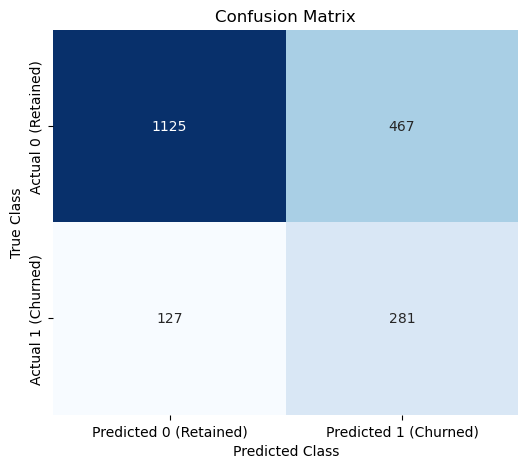

In [29]:
print("--- Evaluation of Logistic Regression Model ---")

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0 (Retained)', 'Predicted 1 (Churned)'],
            yticklabels=['Actual 0 (Retained)', 'Actual 1 (Churned)'])
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [30]:
# 2. Main Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision for class 1 (Churn): {precision:.4f}")
print(f"Recall for class 1 (Churn): {recall:.4f}")
print(f"F1-Score for class 1 (Churn): {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


Accuracy: 0.7030
Precision for class 1 (Churn): 0.3757
Recall for class 1 (Churn): 0.6887
F1-Score for class 1 (Churn): 0.4862
AUC-ROC: 0.7643


In [31]:
# 3. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Retained (0)', 'Churned (1)']))


Classification Report:
              precision    recall  f1-score   support

Retained (0)       0.90      0.71      0.79      1592
 Churned (1)       0.38      0.69      0.49       408

    accuracy                           0.70      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.70      0.73      2000



<Figure size 800x600 with 0 Axes>

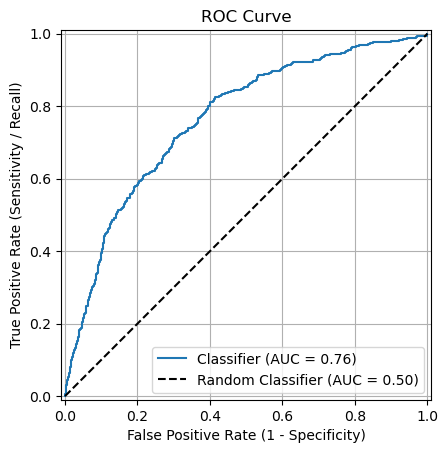

In [32]:
# 4. ROC Curve and AUC-ROC (Visualization)
# Additional ROC curve visualization
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)') # Add a random classifier
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity / Recall)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Training and Evaluation of Random Forest

In [33]:
print("--- Training and Evaluation of Random Forest ---")

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

print("Starting Random Forest training...")
rf_model.fit(X_train, y_train)
print("Random Forest training completed.")

--- Training and Evaluation of Random Forest ---
Starting Random Forest training...
Random Forest training completed.


In [34]:
# Predictions on the test set
rf_y_pred = rf_model.predict(X_test)
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_y_pred, target_names=['Retained (0)', 'Churned (1)']))

rf_auc_roc = roc_auc_score(y_test, rf_y_pred_proba)
print(f"AUC-ROC for Random Forest: {rf_auc_roc:.4f}")


Classification Report for Random Forest:
              precision    recall  f1-score   support

Retained (0)       0.87      0.96      0.91      1592
 Churned (1)       0.74      0.42      0.54       408

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000

AUC-ROC for Random Forest: 0.8411


<Figure size 800x600 with 0 Axes>

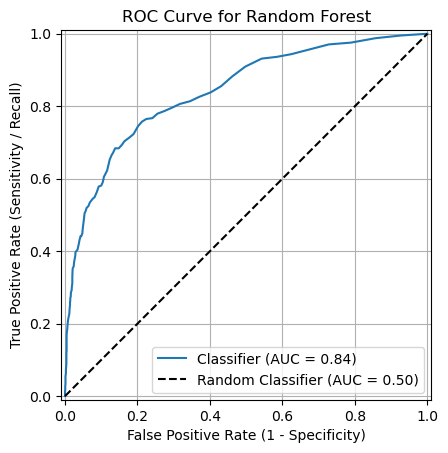

In [35]:
# ROC curve for Random Forest
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, rf_y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity / Recall)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

In [36]:
print("--- Starting Hyperparameter Tuning for Random Forest ---")

# Define hyperparameter ranges for search
param_distributions_rf = {
    'n_estimators': randint(100, 500), 
    'max_depth': randint(5, 20), 
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', 0.7, 0.8, 0.9, 1.0], 
}

rf_base_model = RandomForestClassifier(class_weight='balanced', random_state=42)

random_search_rf = RandomizedSearchCV(estimator=rf_base_model,
                                      param_distributions=param_distributions_rf,
                                      n_iter=50,
                                      cv=3,
                                      scoring='roc_auc',
                                      n_jobs=-1,
                                      random_state=42,
                                      verbose=2)

--- Starting Hyperparameter Tuning for Random Forest ---


In [37]:
# Train the model
print("Starting Random Forest training...")
start_time_rf = time.time()
random_search_rf.fit(X_train, y_train)
end_time_rf = time.time()
print("Random Forest training completed.")
print(f"RandomizedSearchCV execution time for Random Forest: {end_time_rf - start_time_rf:.2f} seconds")

Starting Random Forest training...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Random Forest training completed.
RandomizedSearchCV execution time for Random Forest: 138.50 seconds


In [38]:
print("\nBest parameters found by Randomized Search for Random Forest:")
print(random_search_rf.best_params_)
print(f"\nBest AUC-ROC on cross-validation for Random Forest: {random_search_rf.best_score_:.4f}")

# Evaluate the best Random Forest model on the test set
best_rf_model = random_search_rf.best_estimator_
rf_y_pred_tuned = best_rf_model.predict(X_test)
rf_y_pred_proba_tuned = best_rf_model.predict_proba(X_test)[:, 1]

print("\nClassification Report for tuned Random Forest:")
print(classification_report(y_test, rf_y_pred_tuned, target_names=['Retained (0)', 'Churned (1)']))
print(f"AUC-ROC for TUNED Random Forest: {roc_auc_score(y_test, rf_y_pred_proba_tuned):.4f}")


Best parameters found by Randomized Search for Random Forest:
{'max_depth': 7, 'max_features': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 472}

Best AUC-ROC on cross-validation for Random Forest: 0.8629

Classification Report for tuned Random Forest:
              precision    recall  f1-score   support

Retained (0)       0.93      0.82      0.87      1592
 Churned (1)       0.51      0.74      0.61       408

    accuracy                           0.80      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.80      0.82      2000

AUC-ROC for TUNED Random Forest: 0.8587


## Training and Evaluation of XGBoost

In [39]:
print("\n--- Training and Evaluation of XGBoost ---")

# Initialize XGBoost model
# scale_pos_weight - for handling class imbalance (number of negative / number of positive)
# Since we used stratify=y, ratio = count(0) / count(1)
scale_pos_weight_value = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              n_estimators=100, # Number of trees
                              learning_rate=0.1, # Learning rate
                              eval_metric='logloss',
                              scale_pos_weight=scale_pos_weight_value, # Handle imbalance
                              random_state=42)
# Train the model
print("Starting XGBoost training...")
xgb_model.fit(X_train, y_train)
print("XGBoost training completed.")


--- Training and Evaluation of XGBoost ---
Starting XGBoost training...
XGBoost training completed.


In [40]:
# Predictions on the test set
xgb_y_pred = xgb_model.predict(X_test)
xgb_y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, xgb_y_pred, target_names=['Retained (0)', 'Churned (1)']))

xgb_auc_roc = roc_auc_score(y_test, xgb_y_pred_proba)
print(f"AUC-ROC for XGBoost: {xgb_auc_roc:.4f}")


Classification Report for XGBoost:
              precision    recall  f1-score   support

Retained (0)       0.92      0.84      0.88      1592
 Churned (1)       0.54      0.71      0.61       408

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.74      2000
weighted avg       0.84      0.82      0.82      2000

AUC-ROC for XGBoost: 0.8496


<Figure size 800x600 with 0 Axes>

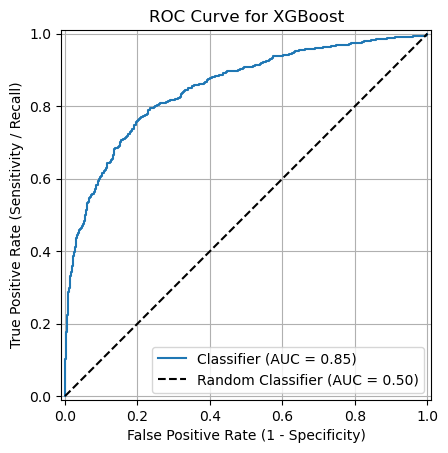

In [41]:
# ROC curve for XGBoost
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, xgb_y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.title('ROC Curve for XGBoost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity / Recall)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

In [42]:
print("--- Starting Hyperparameter Tuning for XGBoost ---")

# Define hyperparameter ranges for search
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees
    'learning_rate': [0.05, 0.1, 0.15], # Learning rate
    'max_depth': [3, 4, 5], # Maximum tree depth
    'subsample': [0.7, 0.8, 0.9], # Fraction of samples for each tree
    'colsample_bytree': [0.7, 0.8, 0.9], # Fraction of features for each tree
    'gamma': [0, 0.1, 0.2] # Minimum loss reduction required to make a further partition on a leaf node
}

# Initialize XGBoost Classifier with imbalance parameters
xgb_base_model = xgb.XGBClassifier(objective='binary:logistic',
                                       eval_metric='logloss',
                                       scale_pos_weight=scale_pos_weight_value,
                                       random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_base_model,
                           param_grid=param_grid,
                           cv=3,
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           verbose=2) 

--- Starting Hyperparameter Tuning for XGBoost ---


In [43]:
# Measure execution time
start_time = time.time()

# Run search for best hyperparameters
grid_search.fit(X_train, y_train)

end_time = time.time()
print(f"GridSearchCV execution time: {end_time - start_time:.2f} seconds")

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
GridSearchCV execution time: 107.02 seconds


In [44]:
# Get best parameters and best result
print("\nBest parameters found by Grid Search:")
print(grid_search.best_params_)

print(f"\nBest AUC-ROC on cross-validation: {grid_search.best_score_:.4f}")

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
print("\n--- Evaluating the best Tuned XGBoost model ---")
tuned_xgb_y_pred = best_xgb_model.predict(X_test)
tuned_xgb_y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]

print("\nClassification Report for TUNED XGBoost:")
print(classification_report(y_test, tuned_xgb_y_pred, target_names=['Retained (0)', 'Churned (1)']))

tuned_xgb_auc_roc = roc_auc_score(y_test, tuned_xgb_y_pred_proba)
print(f"AUC-ROC for TUNED XGBoost: {tuned_xgb_auc_roc:.4f}")


Best parameters found by Grid Search:
{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}

Best AUC-ROC on cross-validation: 0.8665

--- Evaluating the best Tuned XGBoost model ---

Classification Report for TUNED XGBoost:
              precision    recall  f1-score   support

Retained (0)       0.93      0.81      0.87      1592
 Churned (1)       0.51      0.76      0.61       408

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.84      0.80      0.81      2000

AUC-ROC for TUNED XGBoost: 0.8661


<Figure size 800x600 with 0 Axes>

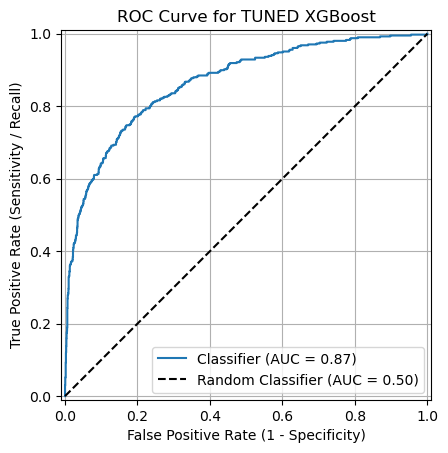

In [45]:
# ROC curve for tuned XGBoost
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, tuned_xgb_y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.title('ROC Curve for TUNED XGBoost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity / Recall)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Overall Conclusion on Model Selection:
Based on these results:

XGBoost is the best model among the three for this task, as it has the highest F1-Score (0.61) and AUC-ROC (0.8661), indicating the best trade-off between churn identification (Recall) and the reliability of these predictions (Precision). It is able to effectively detect a significant fraction of churning customers while generating fewer false positives than logistic regression.

Random Forest is also a very powerful model, but its low Recall for the churn class can be a problem if the priority is to detect all possible churn cases. If the business values reliable churn predictions (so as not to waste resources on "false positives"), then Random Forest with its high Precision could be considered.

Logistic regression is a good baseline model that helped to highlight the importance of handling class imbalance and gave a first look at the challenges of the task. However, its performance is inferior to more complex ensemble methods.